In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

`dataset: https://www.kaggle.com/arnaudeq/cats-vs-dogs-1000#dogs_cats_sample_1000.zip`

In [10]:
train_data_dir = 'dogs_cats_sample_1000/train'
validation_data_dir = 'dogs_cats_sample_1000/valid'

In [41]:
from keras.preprocessing.image import ImageDataGenerator

img_width, img_height, channels = 150, 150, 3
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [87]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [15]:
from keras import applications
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense

In [47]:
vgg16 = applications.VGG16(weights='imagenet', include_top=False, 
                           input_shape=(img_width, img_height, channels))

In [48]:
top_model = Sequential()
top_model.add(Flatten(input_shape=vgg16.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

In [53]:
model = Sequential()
for layer in vgg16.layers:
    model.add(layer)
model.add(top_model)

In [57]:
for layer in model.layers[:-1]:
    layer.trainable = False

In [58]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)       295168    
__________

In [64]:
model.fit_generator(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    steps_per_epoch=60,
    validation_steps=25)

Epoch 1/5
60/60 [==============================] - 654s 11s/step - loss: 0.5553 - acc: 0.7432 - val_loss: 0.2788 - val_acc: 0.8862
Epoch 2/5
60/60 [==============================] - 650s 11s/step - loss: 0.3533 - acc: 0.8380 - val_loss: 0.3425 - val_acc: 0.8400
Epoch 3/5
60/60 [==============================] - 706s 12s/step - loss: 0.2750 - acc: 0.8787 - val_loss: 0.2520 - val_acc: 0.8890
Epoch 4/5
60/60 [==============================] - 727s 12s/step - loss: 0.2659 - acc: 0.8890 - val_loss: 0.2279 - val_acc: 0.9087
Epoch 5/5
60/60 [==============================] - 661s 11s/step - loss: 0.2654 - acc: 0.8870 - val_loss: 0.2760 - val_acc: 0.8814


In [65]:
model.save('cats_dogs_model.hdf5')

In [66]:
import os
path = 'dogs_cats_sample_1000/valid/cats'
images = os.listdir(path)

In [74]:
from PIL import Image
cat = Image.open(f'{path}/{images[5]}')

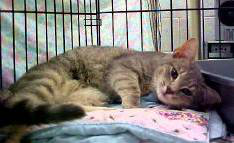

In [75]:
cat

In [76]:
np.array(cat).shape

(143, 234, 3)

In [80]:
cat_array = np.array(cat)

In [84]:
def make_square(im, min_size, fill_color=(0, 0, 0)):
    x, y = im.size
    size = max(min_size, x, y)
    new_im = Image.new('RGB', (size, size), fill_color)
    new_im.paste(im, ((size - x) // 2, (size - y) // 2))
    return new_im

In [85]:
squared_cat = make_square(cat, 150)

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt

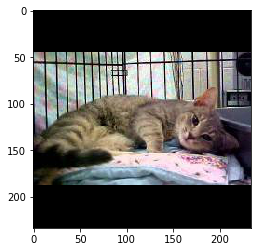

In [97]:
plt.imshow(np.array(squared_cat));

In [99]:
squared_cat = squared_cat.resize((150, 150))

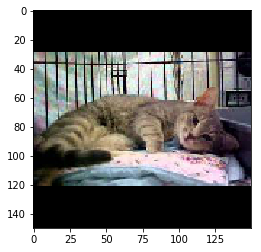

In [100]:
plt.imshow(np.array(squared_cat));

In [88]:
validation_generator.class_indices

{'cats': 0, 'dogs': 1}

In [102]:
model.predict(np.array(squared_cat)[None,...] / 255)

array([[0.01185194]], dtype=float32)

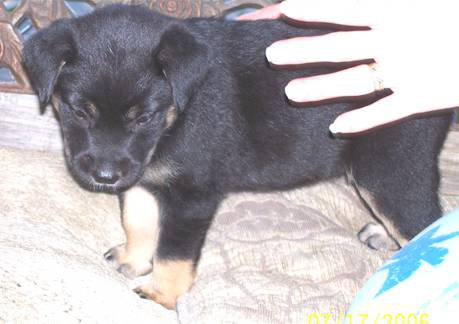

In [127]:
dogs = 'dogs_cats_sample_1000/valid/dogs'
images = os.listdir(dogs)
dog = Image.open(f'{dogs}/{images[350]}')
dog

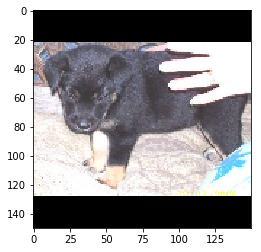

In [128]:
squared_dog = make_square(dog, 150)
squared_dog = squared_dog.resize((150, 150))
plt.imshow(squared_dog);

In [129]:
model.predict(np.array(squared_dog)[None,...] / 255)

array([[0.6966609]], dtype=float32)